In [ ]:
# Reseñas de Google Maps: Edición Restaurante de Lima, Perú
# Alrededor de 378969 mil reseñas únicas de restaurantes de los distritos del centro de Lima, Perú
# 📊 Acerca del conjunto de datos


In [73]:
# Cargando el dataset reseñas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuración de rutas
BASE_DIR = Path('..')
DATA_RAW = BASE_DIR / 'data' / 'raw'
DATA_PROCESSED = BASE_DIR / 'data' / 'processed'

# Cargar datasets
df_reseñas = pd.read_csv(DATA_RAW / 'Lima_Restaurants_2025_08_13.csv')
df_restaurantes = pd.read_csv(DATA_RAW / 'restaurant_metadata.csv')

print(f"✅ Dataset de reseñas cargado: {len(df_reseñas)} registros")
print(f"✅ Dataset de restaurantes cargado: {len(df_restaurantes)} registros")


✅ Dataset de reseñas cargado: 378969 registros
✅ Dataset de restaurantes cargado: 1055 registros


In [9]:
# ==========================================
# EXPLORACIÓN INICIAL DE LOS DATOS (EDA)
# ==========================================


In [74]:
# EDA del dataset reseñas
# 1.1 Obtener un resumen del DataFrame
print("=" * 60)
print("INFORMACIÓN DEL DATASET DE RESEÑAS")
print("=" * 60)
df_reseñas.info()


INFORMACIÓN DEL DATASET DE RESEÑAS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378969 entries, 0 to 378968
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id_review       378969 non-null  object
 1   caption         200455 non-null  object
 2   relative_date   378969 non-null  object
 3   review_date     378969 non-null  object
 4   retrieval_date  378969 non-null  object
 5   rating          378969 non-null  int64 
 6   username        378967 non-null  object
 7   n_review_user   378969 non-null  int64 
 8   url_user        378969 non-null  object
 9   url_place       378969 non-null  object
 10  id_place        378969 non-null  object
dtypes: int64(2), object(9)
memory usage: 31.8+ MB


In [75]:
# 1.2 Obtener un resumen estadístico de las columnas numéricas
df_reseñas.describe()


,rating,n_review_user
count,378969.000000,378969.000000
mean,4.310952,51.885112
std,1.070956,139.699019
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,14.000000
75%,5.000000,55.000000
max,5.000000,42202.000000


In [76]:
# 1.3 Resumen estadístico completo (incluyendo categóricas)
df_reseñas.describe(include='all')


,id_review,caption,relative_date,review_date,retrieval_date,rating,username,n_review_user,url_user,url_place,id_place
count,378969,200455,378969,378969,378969,378969.000000,378967,378969.000000,378969,378969,378969
unique,378967,173927,109,378969,378969,NaN,216336,NaN,230892,1012,1012
top,ChZDSUhNMG9nS0VJQ0FnSURiMlBPTENnEAE,Excelente,Hace 2 años,2019-08-14 02:55:32.748162,2025-08-12 02:55:32.748162,NaN,Carlos,NaN,https://www.google.com/maps/contrib/1029978629...,https://www.google.com/maps/place/?q=place_id:...,ChIJU-JWWR7IBZERfbLL1w-dyj0
freq,2,1796,60060,1,1,NaN,83,NaN,69,3000,3000
mean,NaN,NaN,NaN,NaN,NaN,4.310952,NaN,51.885112,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.070956,NaN,139.699019,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,0.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,14.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,55.000000,NaN,NaN,NaN


In [77]:
# 1.4 Verificar cuántos valores únicos hay en cada columna
print("\n📊 Valores únicos por columna:")
print(df_reseñas.nunique())



📊 Valores únicos por columna:
id_review         378967
caption           173927
relative_date        109
review_date       378969
retrieval_date    378969
rating                 5
username          216336
n_review_user       1044
url_user          230892
url_place           1012
id_place            1012
dtype: int64


In [78]:
# 1.5 Verificar cuántos valores nulos hay en cada columna
print("\n🔍 Valores nulos por columna:")
print(df_reseñas.isnull().sum())



🔍 Valores nulos por columna:
id_review              0
caption           178514
relative_date          0
review_date            0
retrieval_date         0
rating                 0
username               2
n_review_user          0
url_user               0
url_place              0
id_place               0
dtype: int64


In [79]:
# Estadísticas básicas de ratings
print("\n📈 Estadísticas de ratings:")
print(df_reseñas['rating'].describe())



📈 Estadísticas de ratings:
count    378969.000000
mean          4.310952
std           1.070956
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64


In [80]:
# ==========================================
# ANÁLISIS UNIVARIANTE
# ==========================================


Cantidad de reseñas por rating:
rating
1     18134
2     11287
3     34064
4     86603
5    228881
Name: count, dtype: int64


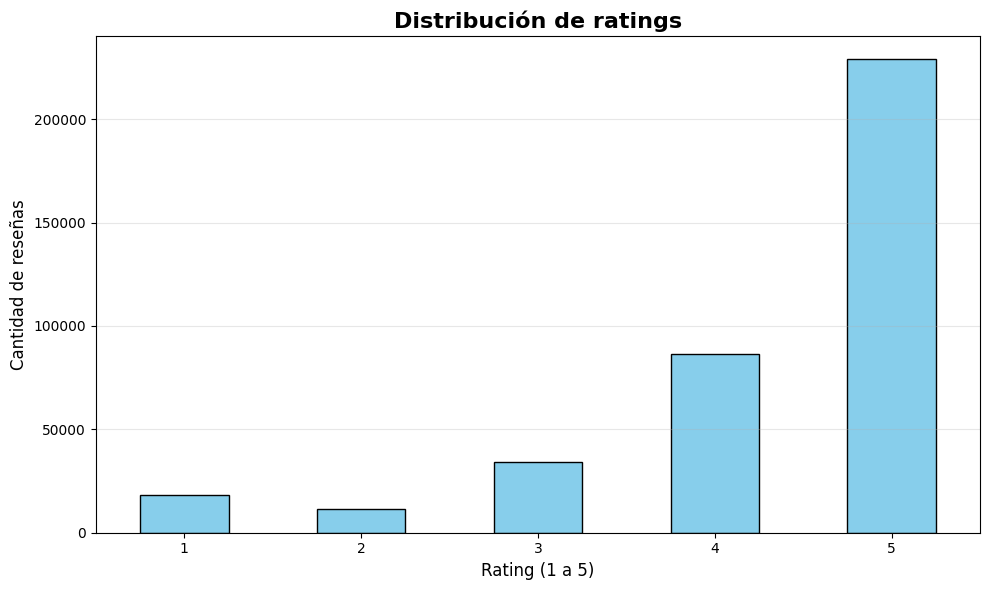

In [81]:
# 5.1. Análisis del dataset de reseñas – Distribución de ratings
import matplotlib.pyplot as plt

# Contar cuántas reseñas hay por cada calificación
conteo_ratings = df_reseñas['rating'].value_counts().sort_index()

print("Cantidad de reseñas por rating:")
print(conteo_ratings)

plt.figure(figsize=(10, 6))
conteo_ratings.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribución de ratings", fontsize=16, fontweight='bold')
plt.xlabel("Rating (1 a 5)", fontsize=12)
plt.ylabel("Cantidad de reseñas", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Número de reseñas por año:
año
2011        1
2012        4
2013       22
2014       14
2015       50
2016      351
2017     2652
2018    12879
2019    46837
2020    43305
2021    26933
2022    57020
2023    63533
2024    80423
2025    44945
Name: count, dtype: int64


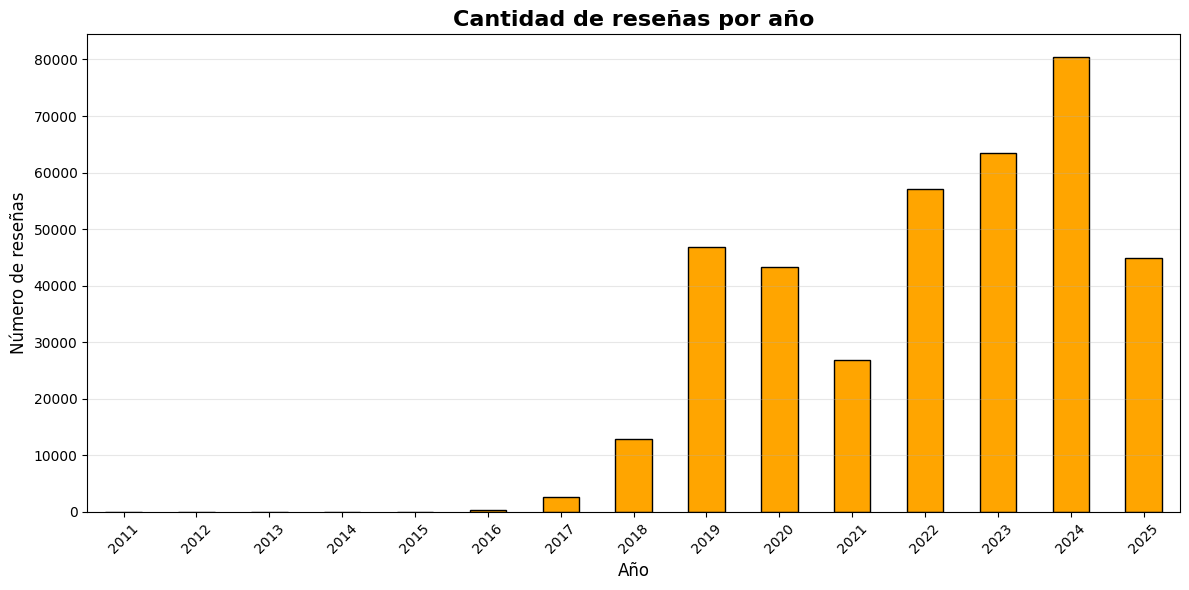

In [83]:
# 5.2. Análisis temporal – Reseñas por año
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar que la columna de fechas esté en formato datetime
df_reseñas['review_date'] = pd.to_datetime(df_reseñas['review_date'], errors='coerce')

# Extraer el año
df_reseñas['año'] = df_reseñas['review_date'].dt.year

# Contar número de reseñas por año
reseñas_por_año = df_reseñas['año'].value_counts().sort_index()

# Mostrar conteo
print("Número de reseñas por año:")
print(reseñas_por_año)

# Gráfico
plt.figure(figsize=(12, 6))
reseñas_por_año.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Cantidad de reseñas por año", fontsize=16, fontweight='bold')
plt.xlabel("Año", fontsize=12)
plt.ylabel("Número de reseñas", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [84]:
# 5.3 Análisis del dataset de reseñas – longitud del comentario
import pandas as pd
import matplotlib.pyplot as plt

def conteo_palabras_seguro(x):
    if pd.isna(x):         # si es NaN
        return 0           # sin palabras
    # si quieres también tratar cadenas vacías/espacios:
    x = str(x).strip()
    if x == "":
        return 0
    return len(x.split())

# Recalcular
df_reseñas['caption_length'] = df_reseñas['caption'].apply(conteo_palabras_seguro)

# Revisar cuántos faltan realmente
print("Sin texto (0 palabras):", (df_reseñas['caption_length'] == 0).sum())

# Ver distribución (solo comentarios con texto)
conteo_palabras = df_reseñas.loc[df_reseñas['caption_length'] > 0, 'caption_length'] \
                             .value_counts().sort_index()
print("\n📊 Primeras 10 longitudes más comunes:")
print(conteo_palabras.head(10))


Sin texto (0 palabras): 178514

📊 Primeras 10 longitudes más comunes:
caption_length
1     11141
2     16636
3      9826
4     11601
5     11011
6     10548
7      9811
8      8486
9      7860
10     6973
Name: count, dtype: int64


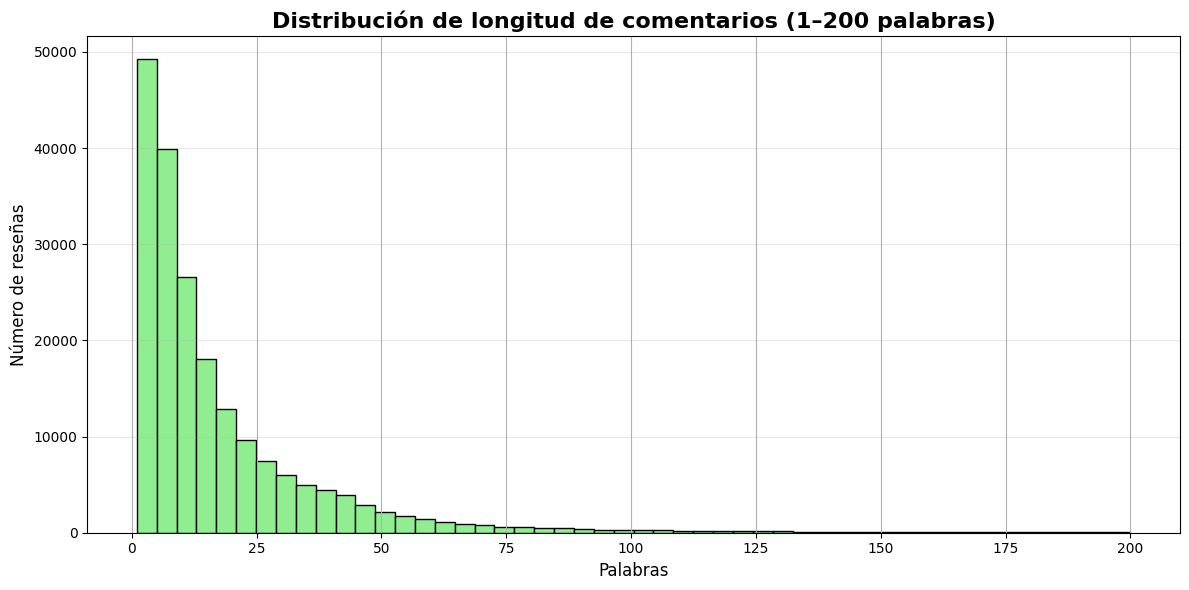

In [85]:
# Histograma enfocado en comentarios de 1-200 palabras
plt.figure(figsize=(12, 6))
df_reseñas.loc[df_reseñas['caption_length'].between(1, 200), 'caption_length'] \
          .hist(bins=50, color='lightgreen', edgecolor='black')
plt.title("Distribución de longitud de comentarios (1–200 palabras)", fontsize=16, fontweight='bold')
plt.xlabel("Palabras", fontsize=12)
plt.ylabel("Número de reseñas", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [86]:
# Comentario más corto/largo con texto real
fila_min = df_reseñas.loc[df_reseñas['caption_length'] > 0] \
                      .loc[lambda d: d['caption_length'].idxmin()]
fila_max = df_reseñas.loc[df_reseñas['caption_length'].idxmax()]
print("\nMás corto (con texto):", fila_min['caption_length'], "palabras\n", fila_min['caption'])
print("\nMás largo:", fila_max['caption_length'], "palabras")



Más corto (con texto): 1 palabras
 Recomendable

Más largo: 811 palabras


In [87]:
# Estadísticas de longitud de comentarios
print("\n📈 Estadísticas de longitud de comentarios:")
print(df_reseñas['caption_length'].describe())



📈 Estadísticas de longitud de comentarios:
count    378969.000000
mean          9.545390
std          20.582405
min           0.000000
25%           0.000000
50%           1.000000
75%          11.000000
max         811.000000
Name: caption_length, dtype: float64


In [88]:
# Ejemplos de comentarios de 1 palabra
print("\n📝 Ejemplos de comentarios de 1 palabra:")
display(df_reseñas[df_reseñas['caption_length'] == 1][['caption', 'rating']].head(20))



📝 Ejemplos de comentarios de 1 palabra:


,caption,rating
14,Recomendable,4
144,Arriba,5
329,Excelente,5
338,Excelente,5
357,Rico,5
369,Excelente,5
394,Tradicional!!!,5
400,Excelente,5
434,Bien,5
502,Excelente,5


In [89]:
# Análisis detallado de longitudes
conteo_palabras = df_reseñas['caption_length'].value_counts().sort_index()
print("\n📊 Cantidad de comentarios por número de palabras (primeros 100):")
print(conteo_palabras.head(100))



📊 Cantidad de comentarios por número de palabras (primeros 100):
caption_length
0     178514
1      11141
2      16636
3       9826
4      11601
       ...  
95        74
96        83
97        89
98        76
99        66
Name: count, Length: 100, dtype: int64


In [90]:
# Comentario más corto - análisis detallado
min_len = df_reseñas['caption_length'].min()
fila_min = df_reseñas.loc[df_reseñas['caption_length'].idxmin()]
conteo_min = (df_reseñas['caption_length'] == min_len).sum()

print(f"Longitud mínima: {min_len} palabras")
print(f"Cantidad de comentarios con esa longitud: {conteo_min}\n")
print("Ejemplo de comentario más corto:")
print(f"Texto: {fila_min['caption']}")
print(f"Rating: {fila_min['rating']}")


Longitud mínima: 0 palabras
Cantidad de comentarios con esa longitud: 178514

Ejemplo de comentario más corto:
Texto: nan
Rating: 5


In [91]:
# Comentario más largo - análisis detallado
max_len = df_reseñas['caption_length'].max()
fila_max = df_reseñas.loc[df_reseñas['caption_length'].idxmax()]
conteo_max = (df_reseñas['caption_length'] == max_len).sum()

print(f"Longitud máxima: {max_len} palabras")
print(f"Cantidad de comentarios con esa longitud: {conteo_max}\n")
print("Ejemplo de comentario más largo:")
print("Texto:", fila_max['caption'][:500], "...")  # Primeros 500 caracteres
print(f"Rating: {fila_max['rating']}")


Longitud máxima: 811 palabras
Cantidad de comentarios con esa longitud: 1

Ejemplo de comentario más largo:
Texto: CONAMU  cocina coreana  Nuestras caracteristicas  ★ DOSIRAK (도시락) ★  (Varios alimentos cocinados, divididos en compartimentos en una bandeja) • Dosirak Especial (도시락 스페셜) - S/. Arroz blanco, chuleta de cerdo frita (Donkasu), fideos fritos (Chapche), rosbif (Bulgogui), rollito de algas (Kimbab), rollito de huevo coreano (KeranMari), nuggets de pollo con miel (Pollo Dulce) • Dosirak de panza de cerdo (삼겹살 도시락) - S/. Arroz blanco, panceta de cerdo a la parrilla (Samgyupsal), fideos fritos (Chapche) ...
Rating: 5


⚠️ WordCloud no está instalado. Mostrando análisis de frecuencia alternativo...


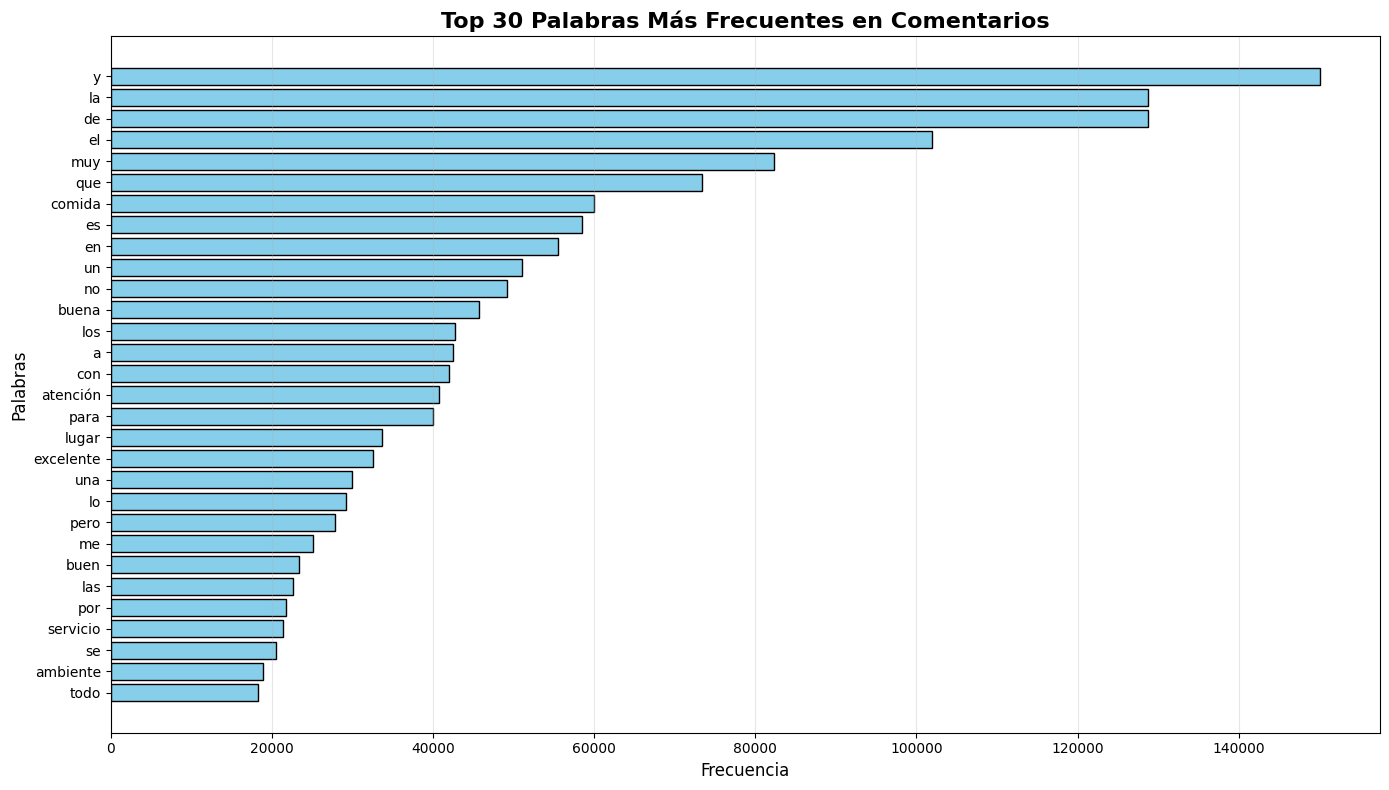

✅ Análisis de frecuencia completado: 51585 palabras únicas


In [92]:
# Nube de palabras para ver términos frecuentes (OPCIONAL)
# Nota: Si wordcloud no está instalado, esta celda se saltará
try:
    from wordcloud import WordCloud

    text = " ".join(df_reseñas['caption'].dropna())
    wc = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(15, 8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title("Nube de palabras - Comentarios de reseñas", fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    print("✅ Nube de palabras generada correctamente")
except ImportError:
    print("⚠️ WordCloud no está instalado. Mostrando análisis de frecuencia alternativo...")

    # Alternativa: Análisis de frecuencia de palabras con gráfico de barras
    from collections import Counter
    import re

    # Extraer todas las palabras
    all_text = " ".join(df_reseñas['caption'].dropna().astype(str))
    words = re.findall(r'\b[a-záéíóúñ]+\b', all_text.lower())

    # Contar frecuencias
    word_freq = Counter(words)

    # Top 30 palabras más comunes
    top_words = dict(word_freq.most_common(30))

    # Visualizar
    plt.figure(figsize=(14, 8))
    plt.barh(list(top_words.keys())[::-1], list(top_words.values())[::-1], color='skyblue', edgecolor='black')
    plt.xlabel('Frecuencia', fontsize=12)
    plt.ylabel('Palabras', fontsize=12)
    plt.title('Top 30 Palabras Más Frecuentes en Comentarios', fontsize=16, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f"✅ Análisis de frecuencia completado: {len(word_freq)} palabras únicas")
except Exception as e:
    print(f"⚠️ Error al generar visualización de palabras: {e}")
    print("Continuando con el análisis...")


In [93]:
# ==========================================
# EDA DEL DATASET RESTAURANTES
# ==========================================


In [94]:
# 1.1 Obtener un resumen del DataFrame Restaurantes
print("=" * 60)
print("INFORMACIÓN DEL DATASET DE RESTAURANTES")
print("=" * 60)
df_restaurantes.info()


INFORMACIÓN DEL DATASET DE RESTAURANTES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_place             1055 non-null   object 
 1   url_place            1055 non-null   object 
 2   title                1055 non-null   object 
 3   category             1055 non-null   object 
 4   address              1054 non-null   object 
 5   phoneNumber          916 non-null    object 
 6   completePhoneNumber  916 non-null    object 
 7   domain               542 non-null    object 
 8   url                  542 non-null    object 
 9   stars                1018 non-null   float64
 10  reviews              1052 non-null   float64
 11  district             1055 non-null   object 
 12  lat                  1055 non-null   float64
 13  long                 1055 non-null   float64
dtypes: float64(4), object(10)
memory usage: 115.5+ K

In [95]:
# 1.2 Obtener un resumen estadístico de las columnas numéricas
df_restaurantes.describe()


,stars,reviews,lat,long
count,1018.000000,1052.000000,1055.000000,1055.000000
mean,4.258153,909.429658,-12.043841,-77.021997
std,0.443967,1752.584416,1.244685,0.152197
min,1.000000,0.000000,-12.168119,-77.076196
25%,4.100000,46.000000,-12.124210,-77.037157
50%,4.300000,271.500000,-12.110455,-77.030311
75%,4.500000,1089.250000,-12.091006,-77.020524
max,5.000000,22080.000000,11.265184,-74.190239


In [96]:
# 1.3 Resumen estadístico completo
df_restaurantes.describe(include='all')


,id_place,url_place,title,category,address,phoneNumber,completePhoneNumber,domain,url,stars,reviews,district,lat,long
count,1055,1055,1055,1055,1054,916,916,542,542,1018.000000,1052.000000,1055,1055.000000,1055.000000
unique,1055,1055,1034,89,1030,876,876,345,500,NaN,NaN,7,NaN,NaN
top,ChIJ41RbR-W3BZERtC40lE27kJI,https://www.google.com/maps/place/?q=place_id:...,Rustica,Restaurante,"Mercado de Magdalena, Magdalena del Mar 15086",(01) 6807070,+51 1 6807070,www.facebook.com,http://www.villachicken.com.pe/,NaN,NaN,Miraflores,NaN,NaN
freq,1,1,4,535,3,4,4,74,4,NaN,NaN,185,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.258153,909.429658,NaN,-12.043841,-77.021997
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.443967,1752.584416,NaN,1.244685,0.152197
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,-12.168119,-77.076196
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.100000,46.000000,NaN,-12.124210,-77.037157
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.300000,271.500000,NaN,-12.110455,-77.030311
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,1089.250000,NaN,-12.091006,-77.020524


In [97]:
# 1.4 Verificar cuántos valores únicos hay en cada columna
print("\n📊 Valores únicos por columna:")
print(df_restaurantes.nunique())



📊 Valores únicos por columna:
id_place               1055
url_place              1055
title                  1034
category                 89
address                1030
phoneNumber             876
completePhoneNumber     876
domain                  345
url                     500
stars                    27
reviews                 663
district                  7
lat                    1036
long                   1040
dtype: int64


In [98]:
# 1.5 Verificar cuántos valores nulos hay en cada columna
print("\n🔍 Valores nulos por columna:")
print(df_restaurantes.isnull().sum())



🔍 Valores nulos por columna:
id_place                 0
url_place                0
title                    0
category                 0
address                  1
phoneNumber            139
completePhoneNumber    139
domain                 513
url                    513
stars                   37
reviews                  3
district                 0
lat                      0
long                     0
dtype: int64


In [99]:
# Mostrar primeras filas
print("\n📋 Primeras filas del dataset de restaurantes:")
display(df_restaurantes.head())



📋 Primeras filas del dataset de restaurantes:


,id_place,url_place,title,category,address,phoneNumber,completePhoneNumber,domain,url,stars,reviews,district,lat,long
0,ChIJ41RbR-W3BZERtC40lE27kJI,https://www.google.com/maps/place/?q=place_id:...,La 73,Restaurante,"Av. el Sol 175, Barranco 15063",(01) 2470780,+51 1 2470780,instagram.com,https://instagram.com/la73_barranco?utm_medium...,4.4,1741.0,Barranco,-12.139661,-77.023216
1,ChIJq6DzbfK3BZERzmnElUR7PUM,https://www.google.com/maps/place/?q=place_id:...,Pan Sal Aire,Restaurante,"Av. Almte. Miguel Grau 320, , Lima, Barranco 1...",951 118 993,+51 951 118 993,delivery.pansalaire.pe,https://delivery.pansalaire.pe/,4.6,2229.0,Barranco,-12.148280,-77.021087
2,ChIJQwRnc-23BZERpyhQvLJVMTQ,https://www.google.com/maps/place/?q=place_id:...,Restaurante Javier,Restaurante peruano,"Bajada de Baños 408, Barranco 15063",984 799 808,+51 984 799 808,www.restaurantejavier.pe,https://www.restaurantejavier.pe/,4.3,6810.0,Barranco,-12.149831,-77.023228
3,ChIJbYWvNb63BZER3Mb9WXTrobo,https://www.google.com/maps/place/?q=place_id:...,Nuestro Bistro,Restaurante,"Jr. Colina 107, Barranco 15063",948 721 346,+51 948 721 346,www.instagram.com,https://www.instagram.com/nuestro_bistro/,4.9,122.0,Barranco,-12.145981,-77.022046
4,ChIJQWG-5e63BZERioL90gT0vZ8,https://www.google.com/maps/place/?q=place_id:...,Cala Restaurante & Lounge,Restaurante,"Circuito de Playas, Barranco 15063",998 247 326,+51 998 247 326,NaN,NaN,4.4,8900.0,Barranco,-12.144648,-77.025753


In [ ]:
# ==========================================
# DATA WRANGLING - DATASET RESEÑAS
# ==========================================


In [100]:
# Obtener el número de filas y columnas
num_filas, num_columnas = df_reseñas.shape
print(f"📊 El DataFrame tiene {num_filas} filas y {num_columnas} columnas.")


📊 El DataFrame tiene 378969 filas y 13 columnas.


In [101]:
# Verificar si hay valores duplicados en id_review
duplicados = df_reseñas["id_review"].duplicated().sum()
print(f"🔹 Cantidad de id_review duplicados: {duplicados}")

# Mostrar ejemplos de duplicados (si existen)
if duplicados > 0:
    print("\n⚠️ Ejemplos de id_review duplicados:")
    display(df_reseñas[df_reseñas["id_review"].duplicated(keep=False)].head(10))
else:
    print("✅ No se encontraron id_review duplicados.")


🔹 Cantidad de id_review duplicados: 2

⚠️ Ejemplos de id_review duplicados:


,id_review,caption,relative_date,review_date,retrieval_date,rating,username,n_review_user,url_user,url_place,id_place,año,caption_length
110815,ChZDSUhNMG9nS0VJQ0FnSURiMlBPTENnEAE,NaN,Hace un año,2024-08-10 13:04:33.096662,2025-08-10 13:04:33.096662,4,Andrea Massimo De Angelis,358,https://www.google.com/maps/contrib/1141919495...,https://www.google.com/maps/place/?q=place_id:...,ChIJI4lbum_JBZERIF6xd8TEoSI,2024,0
110816,ChZDSUhNMG9nS0VJQ0FnSURiMlBPTENnEAE,NaN,Hace un año,2024-08-10 13:04:37.835505,2025-08-10 13:04:37.835505,4,Andrea Massimo De Angelis,358,https://www.google.com/maps/contrib/1141919495...,https://www.google.com/maps/place/?q=place_id:...,ChIJI4lbum_JBZERIF6xd8TEoSI,2024,0
210175,ChZDSUhNMG9nS0VJQ0FnSURkM3BIUll3EAE,NaN,Hace un año,2024-08-12 12:08:59.169695,2025-08-12 12:08:59.169695,5,Carlos Vera,163,https://www.google.com/maps/contrib/1162493367...,https://www.google.com/maps/place/?q=place_id:...,ChIJZ3atyZTJBZERUAvEUlw1lL8,2024,0
210176,ChZDSUhNMG9nS0VJQ0FnSURkM3BIUll3EAE,NaN,Hace un año,2024-08-12 12:09:07.165625,2025-08-12 12:09:07.165625,5,Carlos Vera,163,https://www.google.com/maps/contrib/1162493367...,https://www.google.com/maps/place/?q=place_id:...,ChIJZ3atyZTJBZERUAvEUlw1lL8,2024,0


In [102]:
# Eliminar duplicados (manteniendo la primera aparición)
df_reseñas = df_reseñas.drop_duplicates(subset=["id_review"], keep="first").reset_index(drop=True)
print(f"✅ Duplicados eliminados. Total de registros ahora: {len(df_reseñas)}")


✅ Duplicados eliminados. Total de registros ahora: 378967


In [103]:
# Contar cuántos captions vacíos o nulos hay
print("🔍 Análisis de captions vacíos:")
print(f"Vacíos (NaN): {df_reseñas['caption'].isna().sum()}")
print(f"En blanco: {(df_reseñas['caption'].str.strip() == '').sum()}")


🔍 Análisis de captions vacíos:
Vacíos (NaN): 178512
En blanco: 0


In [104]:
# Mostrar ejemplos de captions vacíos
print("\n📋 Ejemplos de captions vacíos o nulos:")
display(df_reseñas.loc[
    df_reseñas['caption'].isna() | (df_reseñas['caption'].str.strip() == ""),
    ['id_review', 'username', 'rating', 'caption', 'review_date', 'id_place']
].head(20))



📋 Ejemplos de captions vacíos o nulos:


,id_review,username,rating,caption,review_date,id_place
0,ChZDSUhNMG9nS0VJQ0FnSUNVLV9HNEJ3EAE,Eduardo Rentería,5,NaN,2019-08-14 02:55:32.748162,ChIJ--Rcshq4BZERPIDegz6p5-o
1,ChZDSUhNMG9nS0VJQ0FnSURrb2FUZk5REAE,Margot Menacho,5,NaN,2019-08-14 02:55:32.748573,ChIJ--Rcshq4BZERPIDegz6p5-o
2,ChdDSUhNMG9nS0VJQ0FnSUNFdEtlbW93RRAB,Johrdan Davila Ruiz,5,NaN,2019-08-14 02:55:32.749164,ChIJ--Rcshq4BZERPIDegz6p5-o
5,ChZDSUhNMG9nS0VJQ0FnSURZa3NySFRnEAE,Luis Enrique Yanac Jimenez,4,NaN,2019-08-14 02:55:32.750748,ChIJ--Rcshq4BZERPIDegz6p5-o
7,ChZDSUhNMG9nS0VJQ0FnSUNvblpQeWZBEAE,Lizet Paola Bustamante,5,NaN,2019-08-14 02:55:32.751473,ChIJ--Rcshq4BZERPIDegz6p5-o
8,ChdDSUhNMG9nS0VJQ0FnSUNvM0ppUDRRRRAB,Carlos Palomino,5,NaN,2019-08-14 02:55:32.752028,ChIJ--Rcshq4BZERPIDegz6p5-o
17,ChZDSUhNMG9nS0VJQ0FnSUNLcHZPVmNREAE,enrique ramos vargas,5,NaN,2021-08-13 02:55:28.548130,ChIJ--Rcshq4BZERPIDegz6p5-o
18,ChZDSUhNMG9nS0VJQ0FnSUR5Z09LbFpBEAE,Nelly Catiri,5,NaN,2021-08-13 02:55:28.548505,ChIJ--Rcshq4BZERPIDegz6p5-o
19,ChdDSUhNMG9nS0VJQ0FnSUN5eU9PbG1RRRAB,stefani daal,5,NaN,2021-08-13 02:55:28.548923,ChIJ--Rcshq4BZERPIDegz6p5-o
23,ChZDSUhNMG9nS0VJQ0FnSUNtOHRDMUZBEAE,soledad rossanna ravello arbulú,3,NaN,2022-08-13 02:55:24.383647,ChIJ--Rcshq4BZERPIDegz6p5-o


In [105]:
# ELIMINAR CAMPOS VACIOS Y NULLS CON RESPECTO AL CAMPO 'caption'
df_reseñas.dropna(subset=['caption'], inplace=True)
df_reseñas.reset_index(drop=True, inplace=True)
print(f"✅ Comentarios vacíos/nulos eliminados. Total actual: {len(df_reseñas)}")


✅ Comentarios vacíos/nulos eliminados. Total actual: 200455


In [106]:
# Verificar el resultado
print("\n📋 Primeras filas después de limpiar:")
display(df_reseñas.head())



📋 Primeras filas después de limpiar:


,id_review,caption,relative_date,review_date,retrieval_date,rating,username,n_review_user,url_user,url_place,id_place,año,caption_length
0,ChdDSUhNMG9nS0VJQ0FnSUNFNE5PYV9BRRAB,"Sirven menú variado de lunes a viernes, en bas...",Hace 6 años,2019-08-14 02:55:32.749667,2025-08-12 02:55:32.749667,3,Luis Anticona,31,https://www.google.com/maps/contrib/1029463912...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2019,32
1,ChZDSUhNMG9nS0VJQ0FnSURZNzV6akRREAE,Todo muy rico peeo caro,Hace 6 años,2019-08-14 02:55:32.750200,2025-08-12 02:55:32.750200,4,Adrian Rebaza,67,https://www.google.com/maps/contrib/1063973783...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2019,5
2,ChZDSUhNMG9nS0VJQ0FnSURvdjctSkRBEAE,buena comida,Hace 6 años,2019-08-14 02:55:32.751110,2025-08-12 02:55:32.751110,4,Gabriela Peceros Ripa,0,https://www.google.com/maps/contrib/1168733588...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2019,2
3,ChdDSUhNMG9nS0VJQ0FnSURzc3ViMDBnRRAB,La atención es muy lenta pero es rico.,Hace 5 años,2020-08-13 02:55:28.549590,2025-08-12 02:55:28.549590,3,Mila gutiérrez vásquez,12,https://www.google.com/maps/contrib/1065567613...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2020,8
4,ChdDSUhNMG9nS0VJQ0FnSURzbEphMV9BRRAB,Buenísimo... 5000% recomendable...,Hace 5 años,2020-08-13 02:55:28.549921,2025-08-12 02:55:28.549921,5,O Z,0,https://www.google.com/maps/contrib/1085966709...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2020,3


In [107]:
# Detectar caracteres especiales en los comentarios
import re
from collections import Counter

# Patrón: detecta todo lo que NO sea letra (con o sin tilde), número, espacio o signos comunes
patron_especial = re.compile(r"[^a-zA-ZáéíóúÁÉÍÓÚñÑ\s]")

# Extraer todos los caracteres especiales de los comentarios
caracteres_encontrados = df_reseñas["caption"].dropna().apply(lambda x: patron_especial.findall(str(x)))

# Aplanar la lista de listas
todos_caracteres = [c for sublist in caracteres_encontrados for c in sublist]

# Contar frecuencia de cada carácter especial
contador_caracteres = Counter(todos_caracteres)

# Convertir a DataFrame para visualizar mejor
df_caracteres = pd.DataFrame(contador_caracteres.most_common(), columns=["caracter", "frecuencia"])

# Mostrar los 30 más comunes
print("🔍 Caracteres especiales encontrados en los comentarios:")
display(df_caracteres.head(30))

print(f"\n🔹 Total de caracteres especiales distintos: {len(df_caracteres)}")
print(f"🔹 Total de ocurrencias de caracteres especiales: {sum(contador_caracteres.values())}")


🔍 Caracteres especiales encontrados en los comentarios:


,caracter,frecuencia
0,.,263786
1,",",201538
2,!,52586
3,0,20366
4,1,16736
5,…,11123
6,¡,10736
7,),8508
8,2,8071
9,(,7778



🔹 Total de caracteres especiales distintos: 964
🔹 Total de ocurrencias de caracteres especiales: 680622


In [108]:
# Eliminar solo los caracteres especiales del texto, sin borrar el comentario
df_reseñas["caption_limpio"] = df_reseñas["caption"].astype(str).apply(
    lambda x: patron_especial.sub("", x)
)

# Mostrar comparación antes/después
print("🧹 Ejemplos antes y después de limpiar:")
display(df_reseñas[["caption", "caption_limpio"]].sample(10, random_state=42))


🧹 Ejemplos antes y después de limpiar:


,caption,caption_limpio
56751,"El sitio y el servicio son muy buenos, tuve la...",El sitio y el servicio son muy buenos tuve la ...
163096,Como siempre genial,Como siempre genial
62557,"Excelente servicio y muy buena comida, sin dud...",Excelente servicio y muy buena comida sin duda...
51127,Muy agradable,Muy agradable
78833,Unas sopas buenasas,Unas sopas buenasas
105247,"Excelente lugar, variado muy bueno.",Excelente lugar variado muy bueno
93169,Un referente en Perú para los sánguches. Trato...,Un referente en Perú para los sánguches Trato ...
174159,"Todo excelente, lo recomiendo",Todo excelente lo recomiendo
163450,"Linda atención, mucha variedad",Linda atención mucha variedad
194549,Mala comida y pésima atención.,Mala comida y pésima atención


In [109]:
# Reemplazar caption original con el limpio
df_reseñas["caption"] = df_reseñas["caption_limpio"]
df_reseñas.drop(columns=["caption_limpio"], inplace=True)

# Renombrar 'caption' a 'comment'
df_reseñas.rename(columns={"caption": "comment"}, inplace=True)
print("✅ Se reemplazó el texto original y se renombró a 'comment'.")


✅ Se reemplazó el texto original y se renombró a 'comment'.


In [110]:
# Verificar resultado
display(df_reseñas.head())


,id_review,comment,relative_date,review_date,retrieval_date,rating,username,n_review_user,url_user,url_place,id_place,año,caption_length
0,ChdDSUhNMG9nS0VJQ0FnSUNFNE5PYV9BRRAB,Sirven menú variado de lunes a viernes en base...,Hace 6 años,2019-08-14 02:55:32.749667,2025-08-12 02:55:32.749667,3,Luis Anticona,31,https://www.google.com/maps/contrib/1029463912...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2019,32
1,ChZDSUhNMG9nS0VJQ0FnSURZNzV6akRREAE,Todo muy rico peeo caro,Hace 6 años,2019-08-14 02:55:32.750200,2025-08-12 02:55:32.750200,4,Adrian Rebaza,67,https://www.google.com/maps/contrib/1063973783...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2019,5
2,ChZDSUhNMG9nS0VJQ0FnSURvdjctSkRBEAE,buena comida,Hace 6 años,2019-08-14 02:55:32.751110,2025-08-12 02:55:32.751110,4,Gabriela Peceros Ripa,0,https://www.google.com/maps/contrib/1168733588...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2019,2
3,ChdDSUhNMG9nS0VJQ0FnSURzc3ViMDBnRRAB,La atención es muy lenta pero es rico,Hace 5 años,2020-08-13 02:55:28.549590,2025-08-12 02:55:28.549590,3,Mila gutiérrez vásquez,12,https://www.google.com/maps/contrib/1065567613...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2020,8
4,ChdDSUhNMG9nS0VJQ0FnSURzbEphMV9BRRAB,Buenísimo recomendable,Hace 5 años,2020-08-13 02:55:28.549921,2025-08-12 02:55:28.549921,5,O Z,0,https://www.google.com/maps/contrib/1085966709...,https://www.google.com/maps/place/?q=place_id:...,ChIJ--Rcshq4BZERPIDegz6p5-o,2020,3


In [111]:
# Convertir todo a minúsculas
df_reseñas["comment"] = df_reseñas["comment"].str.lower()
print("✅ Comentarios convertidos a minúsculas.")


✅ Comentarios convertidos a minúsculas.


In [112]:
# Paso 5: Verificar de nuevo si hay campos en blanco en comment
num_filas, num_columnas = df_reseñas.shape
print(f"📊 El DataFrame tiene {num_filas} filas y {num_columnas} columnas.")

# Validando cuantos comments vacíos o nulos hay
print(f"\n🔍 Validación de comments:")
print(f"Vacíos: {df_reseñas['comment'].isna().sum()}")
print(f"En blanco: {(df_reseñas['comment'].str.strip() == '').sum()}")


📊 El DataFrame tiene 200455 filas y 13 columnas.

🔍 Validación de comments:
Vacíos: 0
En blanco: 548


In [113]:
# Eliminar filas donde 'comment' está vacío o tiene solo espacios
df_reseñas = df_reseñas[df_reseñas['comment'].str.strip() != ""]
df_reseñas.reset_index(drop=True, inplace=True)

print("✅ Filas con comentarios en blanco eliminadas.")
print(f"📊 Total actual de registros: {len(df_reseñas)}")
print(f"🔍 Vacíos: {(df_reseñas['comment'].str.strip() == '').sum()}")


✅ Filas con comentarios en blanco eliminadas.
📊 Total actual de registros: 199907
🔍 Vacíos: 0


In [47]:
# ==========================================
# Paso 6: IDENTIFICACIÓN Y ELIMINACIÓN DE STOPWORDS
# ==========================================


In [115]:
# 6.1 Identificación de comentarios compuestos solo por stopwords
from nltk.corpus import stopwords
from collections import Counter
import nltk

# Descargar lista de stopwords en español (solo primera vez)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Cargar stopwords base de NLTK
stop_words = set(stopwords.words('spanish'))

def es_solo_stopwords(texto):
    """Retorna True si el comentario contiene solo stopwords."""
    palabras = texto.split()
    if not palabras:
        return False
    return all(p in stop_words for p in palabras)

# Aplicar la detección
df_reseñas["solo_stopwords"] = df_reseñas["comment"].apply(es_solo_stopwords)
solo_stop = df_reseñas[df_reseñas["solo_stopwords"]].copy()

print(f"✅ Total de comentarios formados solo por stopwords: {len(solo_stop)}")
display(solo_stop[["id_review", "username", "comment"]].head(15))


✅ Total de comentarios formados solo por stopwords: 228


,id_review,username,comment
4257,ChRDSUhNMG9nS0VJQ0FnSUNNcHBnURAB,Juan Bustos,de
4418,ChZDSUhNMG9nS0VJQ0FnSUQ0bGV5NURnEAE,Kamilla Arteta,lo
4563,ChZDSUhNMG9nS0VJQ0FnSURqNC1PakF3EAE,cristian Leonel,muy poco
5105,ChZDSUhNMG9nS0VJQ0FnSURyMTdDblJREAE,Gary Madu,hasta
6626,ChZDSUhNMG9nS0VJQ0FnSUQtcVlLWkl3EAE,Violeta Da Silva,a
7750,ChZDSUhNMG9nS0VJQ0FnSUNncmREQ1lBEAE,Diego Martin Perez,es lo que hay
7890,ChZDSUhNMG9nS0VJQ0FnSUQ5cDRUSkR3EAE,Sandro Delgado Vasquez,a
8270,ChdDSUhNMG9nS0VJQ0FnSUNZdWF6SC13RRAB,Javicho Reyes,lo
8740,ChZDSUhNMG9nS0VJQ0FnSUQyMUoyV0lREAE,Edison Malca,el
9681,ChdDSUhNMG9nS0VJQ0FnSUNwZ1lTM3ZnRRAB,Yohana Rafael (Yoa),todo muy


In [116]:
# 6.2 Análisis de frecuencia de las stopwords detectadas
texto_todo = " ".join(solo_stop["comment"].astype(str))
palabras = texto_todo.lower().split()

contador = Counter(palabras)
df_freq_stop = pd.DataFrame(contador.most_common(), columns=["stopword", "frecuencia"])

print("🔍 Stopwords detectadas y su frecuencia:")
display(df_freq_stop)

print(f"\n🔸 Stopwords distintas: {len(df_freq_stop)}")
print(f"🔹 Total ocurrencias: {df_freq_stop['frecuencia'].sum()}")


🔍 Stopwords detectadas y su frecuencia:


,stopword,frecuencia
0,a,64
1,todo,51
2,de,48
3,no,33
4,es,26
5,ya,22
6,lo,20
7,antes,17
8,como,17
9,en,14



🔸 Stopwords distintas: 50
🔹 Total ocurrencias: 460


In [117]:
# 6.3 Clasificación de stopwords (significativas vs sin significado)
stopwords_significativas = {
    "no","ni","nada","muy","poco","mucho","más","algo","ya","antes",
    "hasta","todo","todos","como","es","era","está","fue","estuvo",
    "tiene","tenían","tienes","tuve","hay","soy","estamos",
    "para","sí"
}

df_freq_stop["mantener"] = df_freq_stop["stopword"].apply(lambda x: x in stopwords_significativas)
print("\n📊 Clasificación de stopwords:")
display(df_freq_stop)



📊 Clasificación de stopwords:


,stopword,frecuencia,mantener
0,a,64,False
1,todo,51,True
2,de,48,False
3,no,33,True
4,es,26,True
5,ya,22,True
6,lo,20,False
7,antes,17,True
8,como,17,True
9,en,14,False


In [118]:
# 6.4 Definición de listas personalizadas y detección de comentarios sin significado
# Stopwords sin valor semántico (las que se eliminarán si están solas)
stopwords_sin_significado = stop_words - stopwords_significativas

def solo_stop_sin_significado(texto):
    """Retorna True si el comentario está formado solo por stopwords sin significado."""
    palabras = texto.split()
    if not palabras:
        return False
    return all(p in stopwords_sin_significado for p in palabras)

# Aplicar al DataFrame
df_reseñas["solo_stop_sin_significado"] = df_reseñas["comment"].apply(solo_stop_sin_significado)
total_eliminar = df_reseñas["solo_stop_sin_significado"].sum()
print(f"🔹 Comentarios solo con stopwords sin significado: {total_eliminar}")


🔹 Comentarios solo con stopwords sin significado: 86


In [119]:
# 6.5. Visualización de ejemplos de comentarios sin significado
solo_sin_significado = df_reseñas[df_reseñas["solo_stop_sin_significado"]]
print("\n📋 Ejemplos de comentarios sin significado:")
display(solo_sin_significado[["id_review", "username", "comment"]].head(20))



📋 Ejemplos de comentarios sin significado:


,id_review,username,comment
4257,ChRDSUhNMG9nS0VJQ0FnSUNNcHBnURAB,Juan Bustos,de
4418,ChZDSUhNMG9nS0VJQ0FnSUQ0bGV5NURnEAE,Kamilla Arteta,lo
6626,ChZDSUhNMG9nS0VJQ0FnSUQtcVlLWkl3EAE,Violeta Da Silva,a
7890,ChZDSUhNMG9nS0VJQ0FnSUQ5cDRUSkR3EAE,Sandro Delgado Vasquez,a
8270,ChdDSUhNMG9nS0VJQ0FnSUNZdWF6SC13RRAB,Javicho Reyes,lo
8740,ChZDSUhNMG9nS0VJQ0FnSUQyMUoyV0lREAE,Edison Malca,el
9756,ChZDSUhNMG9nS0VJQ0FnSUNydjZUOWFREAE,ELMER ILLAN COCHACHIN,de
11595,ChdDSUhNMG9nS0VJQ0FnSURta3FuVzJRRRAB,danitza zapata,de
12025,ChdDSUhNMG9nS0VJQ0FnSUN4MDQyczF3RRAB,Andy Narva Gacon,de
19105,ChdDSUhNMG9nS0VJQ0FnSUMyaWFEcWx3RRAB,Juan Luis Vidal Reyes,a


In [120]:
# 6.6 Eliminación de comentarios sin significado
df_reseñas = df_reseñas[~df_reseñas["solo_stop_sin_significado"]].reset_index(drop=True)
df_reseñas.drop(columns=["solo_stop_sin_significado"], inplace=True, errors="ignore")
print(f"✅ Comentarios sin significado eliminados. Total actual: {len(df_reseñas)} registros.")


✅ Comentarios sin significado eliminados. Total actual: 199821 registros.


In [121]:
# 6.7 Verificación post-proceso
# Volver a comprobar si quedan comentarios formados solo por stopwords
df_reseñas["solo_stopwords"] = df_reseñas["comment"].apply(es_solo_stopwords)
restantes = df_reseñas["solo_stopwords"].sum()

if restantes == 0:
    print("✅ No quedan comentarios formados solo por stopwords.")
else:
    print(f"⚠️ Aún quedan {restantes} comentarios con solo stopwords.")
    display(df_reseñas[df_reseñas["solo_stopwords"]][["id_review", "username", "comment"]].head(10))

# Eliminar columna temporal
df_reseñas.drop(columns=["solo_stopwords"], inplace=True, errors="ignore")


⚠️ Aún quedan 142 comentarios con solo stopwords.


,id_review,username,comment
4561,ChZDSUhNMG9nS0VJQ0FnSURqNC1PakF3EAE,cristian Leonel,muy poco
5103,ChZDSUhNMG9nS0VJQ0FnSURyMTdDblJREAE,Gary Madu,hasta
7747,ChZDSUhNMG9nS0VJQ0FnSUNncmREQ1lBEAE,Diego Martin Perez,es lo que hay
9675,ChdDSUhNMG9nS0VJQ0FnSUNwZ1lTM3ZnRRAB,Yohana Rafael (Yoa),todo muy
9821,ChZDSUhNMG9nS0VJQ0FnTUNnbklPVWZBEAE,Melvin Fernández,estuvo en algo
10132,ChZDSUhNMG9nS0VJQ0FnSUMtd3ZiQU9BEAE,JUAN CARLOS ARRUNATEGUI RAMIREZ,ya no es el de antes
10203,ChdDSUhNMG9nS0VJQ0FnSUNsb19HZTRRRRAB,Santiago collantes urbina,se como
10524,ChdDSUhNMG9nS0VJQ0FnSUNCOHEzMGxnRRAB,Oscar Arriola,hasta
10668,ChdDSUhNMG9nS0VJQ0FnSURreTZDb2dBRRAB,Veronica Tristan,ya no es como antes
11954,ChZDSUhNMG9nS0VJQ0FnSUMyNnNMaEZBEAE,Dora Zandra Ugarte Ugarte,como


In [ ]:
# 6.8 Resultado final del DataFrame limpio
num_filas, num_columnas = df_reseñas.shape
print(f"📊 El DataFrame tiene {num_filas} filas y {num_columnas} columnas.")

print("\n📋 DataFrame final:")
display(df_reseñas.head())


In [ ]:
# ==========================================
# DATA WRANGLING - DATASET RESTAURANTES
# ==========================================


In [57]:
# Obtener el número de filas y columnas que tiene el dataset
num_filas, num_columnas = df_restaurantes.shape
print(f"📊 El DataFrame tiene {num_filas} filas y {num_columnas} columnas.")


📊 El DataFrame tiene 1055 filas y 14 columnas.


In [58]:
# Verificar si hay campos vacíos o nulos en id_place
print("🔍 Validación de id_place:")
print(f"Vacíos: {df_restaurantes['id_place'].isna().sum()}")
print(f"En blanco: {(df_restaurantes['id_place'].str.strip() == '').sum()}")


🔍 Validación de id_place:
Vacíos: 0
En blanco: 0


In [59]:
# Mostrando el dataset restaurantes
print("\n📋 Dataset de restaurantes:")
display(df_restaurantes.head())



📋 Dataset de restaurantes:


,id_place,url_place,title,category,address,phoneNumber,completePhoneNumber,domain,url,stars,reviews,district,lat,long
0,ChIJ41RbR-W3BZERtC40lE27kJI,https://www.google.com/maps/place/?q=place_id:...,La 73,Restaurante,"Av. el Sol 175, Barranco 15063",(01) 2470780,+51 1 2470780,instagram.com,https://instagram.com/la73_barranco?utm_medium...,4.4,1741.0,Barranco,-12.139661,-77.023216
1,ChIJq6DzbfK3BZERzmnElUR7PUM,https://www.google.com/maps/place/?q=place_id:...,Pan Sal Aire,Restaurante,"Av. Almte. Miguel Grau 320, , Lima, Barranco 1...",951 118 993,+51 951 118 993,delivery.pansalaire.pe,https://delivery.pansalaire.pe/,4.6,2229.0,Barranco,-12.148280,-77.021087
2,ChIJQwRnc-23BZERpyhQvLJVMTQ,https://www.google.com/maps/place/?q=place_id:...,Restaurante Javier,Restaurante peruano,"Bajada de Baños 408, Barranco 15063",984 799 808,+51 984 799 808,www.restaurantejavier.pe,https://www.restaurantejavier.pe/,4.3,6810.0,Barranco,-12.149831,-77.023228
3,ChIJbYWvNb63BZER3Mb9WXTrobo,https://www.google.com/maps/place/?q=place_id:...,Nuestro Bistro,Restaurante,"Jr. Colina 107, Barranco 15063",948 721 346,+51 948 721 346,www.instagram.com,https://www.instagram.com/nuestro_bistro/,4.9,122.0,Barranco,-12.145981,-77.022046
4,ChIJQWG-5e63BZERioL90gT0vZ8,https://www.google.com/maps/place/?q=place_id:...,Cala Restaurante & Lounge,Restaurante,"Circuito de Playas, Barranco 15063",998 247 326,+51 998 247 326,NaN,NaN,4.4,8900.0,Barranco,-12.144648,-77.025753


In [ ]:
# ==========================================
# MERGED - DATASET COMPLETO
# ==========================================


In [60]:
# Concatenar los dos DataFrames usando la columna 'id_place'
df_datafinal = pd.merge(df_reseñas, df_restaurantes, on='id_place', how='inner')

print("✅ DataFrames unidos correctamente")
print("\n📋 Primeras filas del dataset final:")
display(df_datafinal.head())


✅ DataFrames unidos correctamente

📋 Primeras filas del dataset final:


,id_review,comment,relative_date,review_date,retrieval_date,rating,username,n_review_user,url_user,url_place_x,...,address,phoneNumber,completePhoneNumber,domain,url,stars,reviews,district,lat,long
0,ChdDSUhNMG9nS0VJQ0FnSUNFNE5PYV9BRRAB,sirven menú variado de lunes a viernes en base...,Hace 6 años,2019-08-14 02:55:32.749667,2025-08-12 02:55:32.749667,3,Luis Anticona,31,https://www.google.com/maps/contrib/1029463912...,https://www.google.com/maps/place/?q=place_id:...,...,"Doña Virginia 105, Santiago de Surco 15049",(01) 7730584,+51 1 7730584,NaN,NaN,4.3,29.0,Surco,-12.140145,-76.999662
1,ChZDSUhNMG9nS0VJQ0FnSURZNzV6akRREAE,todo muy rico peeo caro,Hace 6 años,2019-08-14 02:55:32.750200,2025-08-12 02:55:32.750200,4,Adrian Rebaza,67,https://www.google.com/maps/contrib/1063973783...,https://www.google.com/maps/place/?q=place_id:...,...,"Doña Virginia 105, Santiago de Surco 15049",(01) 7730584,+51 1 7730584,NaN,NaN,4.3,29.0,Surco,-12.140145,-76.999662
2,ChZDSUhNMG9nS0VJQ0FnSURvdjctSkRBEAE,buena comida,Hace 6 años,2019-08-14 02:55:32.751110,2025-08-12 02:55:32.751110,4,Gabriela Peceros Ripa,0,https://www.google.com/maps/contrib/1168733588...,https://www.google.com/maps/place/?q=place_id:...,...,"Doña Virginia 105, Santiago de Surco 15049",(01) 7730584,+51 1 7730584,NaN,NaN,4.3,29.0,Surco,-12.140145,-76.999662
3,ChdDSUhNMG9nS0VJQ0FnSURzc3ViMDBnRRAB,la atención es muy lenta pero es rico,Hace 5 años,2020-08-13 02:55:28.549590,2025-08-12 02:55:28.549590,3,Mila gutiérrez vásquez,12,https://www.google.com/maps/contrib/1065567613...,https://www.google.com/maps/place/?q=place_id:...,...,"Doña Virginia 105, Santiago de Surco 15049",(01) 7730584,+51 1 7730584,NaN,NaN,4.3,29.0,Surco,-12.140145,-76.999662
4,ChdDSUhNMG9nS0VJQ0FnSURzbEphMV9BRRAB,buenísimo recomendable,Hace 5 años,2020-08-13 02:55:28.549921,2025-08-12 02:55:28.549921,5,O Z,0,https://www.google.com/maps/contrib/1085966709...,https://www.google.com/maps/place/?q=place_id:...,...,"Doña Virginia 105, Santiago de Surco 15049",(01) 7730584,+51 1 7730584,NaN,NaN,4.3,29.0,Surco,-12.140145,-76.999662


In [128]:
# Obtener el número de filas y columnas que tiene el DATASET FINAL
num_filas, num_columnas = df_datafinal.shape
print(f"📊 El DataFrame Final tiene {num_filas} filas y {num_columnas} columnas.")


📊 El DataFrame Final tiene 199821 filas y 26 columnas.


In [129]:
# Selección de columnas relevantes para análisis de sentimientos
df_modelo = df_datafinal[[
    "id_review",
    "id_place",
    "comment",     # texto de la reseña
    "rating",      # etiqueta
    "username",    # nombre del usuario
    "review_date", # opcional: análisis temporal
    "title",       # nombre del restaurante
    "category",    # tipo de negocio
    "district"     # ubicación
]]

print("✅ Columnas relevantes seleccionadas para el modelo")
display(df_modelo.head())


✅ Columnas relevantes seleccionadas para el modelo


,id_review,id_place,comment,rating,username,review_date,title,category,district
0,ChdDSUhNMG9nS0VJQ0FnSUNFNE5PYV9BRRAB,ChIJ--Rcshq4BZERPIDegz6p5-o,sirven menú variado de lunes a viernes en base...,3,Luis Anticona,2019-08-14 02:55:32.749667,Restaurante Doña Gladys,Restaurante,Surco
1,ChZDSUhNMG9nS0VJQ0FnSURZNzV6akRREAE,ChIJ--Rcshq4BZERPIDegz6p5-o,todo muy rico peeo caro,4,Adrian Rebaza,2019-08-14 02:55:32.750200,Restaurante Doña Gladys,Restaurante,Surco
2,ChZDSUhNMG9nS0VJQ0FnSURvdjctSkRBEAE,ChIJ--Rcshq4BZERPIDegz6p5-o,buena comida,4,Gabriela Peceros Ripa,2019-08-14 02:55:32.751110,Restaurante Doña Gladys,Restaurante,Surco
3,ChdDSUhNMG9nS0VJQ0FnSURzc3ViMDBnRRAB,ChIJ--Rcshq4BZERPIDegz6p5-o,la atención es muy lenta pero es rico,3,Mila gutiérrez vásquez,2020-08-13 02:55:28.549590,Restaurante Doña Gladys,Restaurante,Surco
4,ChdDSUhNMG9nS0VJQ0FnSURzbEphMV9BRRAB,ChIJ--Rcshq4BZERPIDegz6p5-o,buenísimo recomendable,5,O Z,2020-08-13 02:55:28.549921,Restaurante Doña Gladys,Restaurante,Surco


In [130]:
# Dimensiones del dataset para modelado
num_filas, num_columnas = df_modelo.shape
print(f"📊 El DataFrame para modelado tiene {num_filas} filas y {num_columnas} columnas.")


📊 El DataFrame para modelado tiene 199821 filas y 9 columnas.


In [ ]:
# ==========================================
# ANÁLISIS DE DISTRIBUCIÓN DE RATINGS
# ==========================================


In [131]:
# CUANTOS RATINGS HAY
print("📊 Distribución de ratings:")
print(df_modelo["rating"].value_counts().sort_index())


📊 Distribución de ratings:
rating
1     12950
2      7356
3     17143
4     41483
5    120889
Name: count, dtype: int64


In [132]:
# Crear columna de sentimiento basada en rating
# Se trabajará con 3 clases (sentimiento)
def rating_to_sentiment(r):
    if r in [1, 2]:
        return "negativo"
    elif r == 3:
        return "neutro"
    else:
        return "positivo"

df_modelo["sentimiento"] = df_modelo["rating"].apply(rating_to_sentiment)

print("✅ Columna 'sentimiento' creada")
print("\n📊 Distribución de sentimientos:")
print(df_modelo["sentimiento"].value_counts())


✅ Columna 'sentimiento' creada

📊 Distribución de sentimientos:
sentimiento
positivo    162372
negativo     20306
neutro       17143
Name: count, dtype: int64


C:\Users\wilto\AppData\Local\Temp\ipykernel_25044\2734428562.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelo["sentimiento"] = df_modelo["rating"].apply(rating_to_sentiment)


In [133]:
# EN PORCENTAJE CANTIDAD DE SENTIMIENTOS
print("📊 Distribución de sentimientos (%):")
sentimiento_pct = df_modelo["sentimiento"].value_counts(normalize=True) * 100
print(sentimiento_pct)


📊 Distribución de sentimientos (%):
sentimiento
positivo    81.258727
negativo    10.162095
neutro       8.579178
Name: proportion, dtype: float64


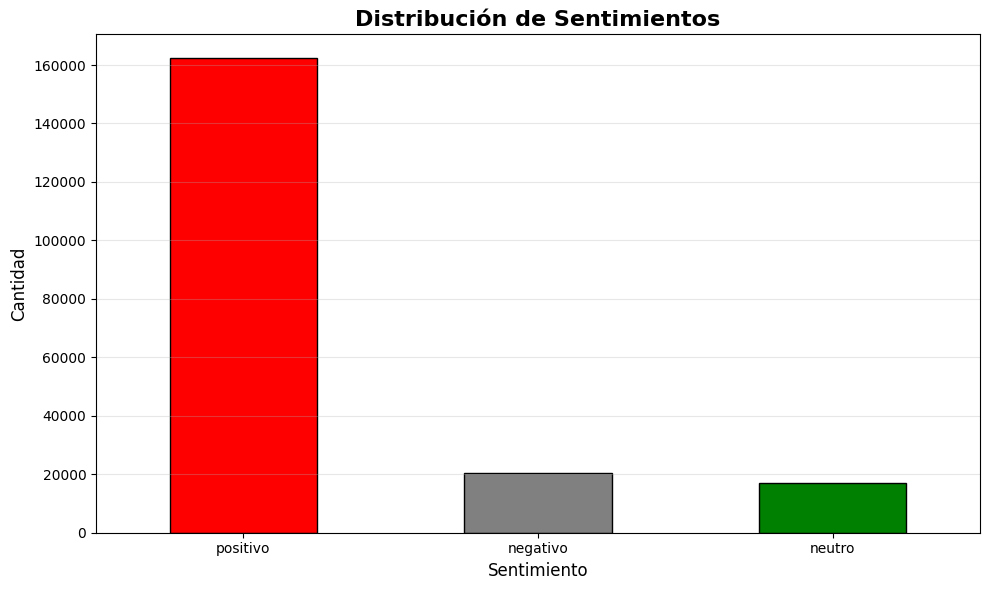

In [134]:
# Visualización de la distribución de sentimientos
plt.figure(figsize=(10, 6))
df_modelo["sentimiento"].value_counts().plot(kind='bar', color=['red', 'gray', 'green'], edgecolor='black')
plt.title("Distribución de Sentimientos", fontsize=16, fontweight='bold')
plt.xlabel("Sentimiento", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [69]:
# ==========================================
# GUARDAR DATASETS PROCESADOS
# ==========================================


In [136]:
# Guardar el dataset limpio para el modelo
output_path = DATA_PROCESSED / 'modelo_limpio.csv'
df_modelo.to_csv(output_path, index=False, encoding='utf-8')
print(f"✅ Dataset para modelado guardado en: {output_path}")
print(f"📊 Dimensiones finales: {df_modelo.shape[0]} filas x {df_modelo.shape[1]} columnas")


✅ Dataset para modelado guardado en: ..\data\processed\modelo_limpio.csv
📊 Dimensiones finales: 199821 filas x 10 columnas


In [137]:
# Resumen final
print("\n" + "="*60)
print("RESUMEN FINAL DEL PROCESAMIENTO")
print("="*60)
print(f"✅ Total de reseñas procesadas: {len(df_modelo):,}")
print(f"✅ Total de restaurantes: {df_modelo['id_place'].nunique():,}")
print(f"✅ Total de usuarios: {df_modelo['username'].nunique():,}")
print(f"\n📊 Distribución de sentimientos:")
print(f"   • Positivo: {(df_modelo['sentimiento'] == 'positivo').sum():,} ({sentimiento_pct['positivo']:.2f}%)")
print(f"   • Negativo: {(df_modelo['sentimiento'] == 'negativo').sum():,} ({sentimiento_pct['negativo']:.2f}%)")
print(f"   • Neutro: {(df_modelo['sentimiento'] == 'neutro').sum():,} ({sentimiento_pct['neutro']:.2f}%)")
print("\n🎯 Dataset listo para construcción del modelo con Redes Bayesianas (Naive Bayes)")
print("="*60)



RESUMEN FINAL DEL PROCESAMIENTO
✅ Total de reseñas procesadas: 199,821
✅ Total de restaurantes: 1,001
✅ Total de usuarios: 121,604

📊 Distribución de sentimientos:
   • Positivo: 162,372 (81.26%)
   • Negativo: 20,306 (10.16%)
   • Neutro: 17,143 (8.58%)

🎯 Dataset listo para construcción del modelo con Redes Bayesianas (Naive Bayes)
